## Blackjack Basic Strategy

This section demonstrates the implementation of a basic strategy for playing Blackjack, as described in Edward O. Thorp's book "Beat the Dealer".


In [292]:
import random

class Blackjack:
    card_values = {
        '2': 2, '3': 3, '4': 4, '5': 5, '6': 6,
        '7': 7, '8': 8, '9': 9, '10': 10, 'J': 10,
        'Q': 10, 'K': 10, 'A': 11
    }

    def __init__(self, num_decks=6):
        self.num_decks = num_decks
        self.deck = self.create_deck()
        self.player_hand = []
        self.dealer_hand = []
        self.wins = 0
        self.losses = 0
        self.ties = 0

    def create_deck(self):
        deck = []
        for _ in range(self.num_decks):
            for card in self.card_values.keys():
                deck.extend([(card, self.card_values[card])] * 4)
        random.shuffle(deck)
        return deck

    def deal_card(self):
        if not self.deck:
            self.deck = self.create_deck()
        return self.deck.pop()

    def evaluate_hand(self, hand):
        value = sum(card[1] for card in hand)
        num_aces = sum(1 for card in hand if card[0] == 'A')
        while value > 21 and num_aces:
            value -= 10
            num_aces -= 1
        return value

    def is_soft_hand(self, hand):
        return any(card[0] == 'A' for card in hand) and self.evaluate_hand(hand) <= 21

    def basic_strategy_decision(self, player_hand, dealer_upcard):
        player_value = self.evaluate_hand(player_hand)
        dealer_upcard_value = self.card_values[dealer_upcard[0]]

        # Pair splitting decisions
        if len(player_hand) == 2 and player_hand[0][1] == player_hand[1][1]:
            pair_value = player_hand[0][1]
            if pair_value in [11, 8]:  # Always split Aces and 8s
                return 'split'
            elif pair_value == 10:  # Never split 10s
                return 'stand'
            elif pair_value == 5:  # Never split 5s, treat as 10
                return 'double' if dealer_upcard_value in range(2, 10) else 'hit'
            elif pair_value == 9:  # Split 9s against dealer 2-9 except 7
                return 'split' if dealer_upcard_value in [2, 3, 4, 5, 6, 8, 9] else 'stand'
            elif pair_value == 7:  # Split 7s against dealer 2-7
                return 'split' if dealer_upcard_value in range(2, 8) else 'hit'
            elif pair_value == 6:  # Split 6s against dealer 2-6
                return 'split' if dealer_upcard_value in range(2, 7) else 'hit'
            elif pair_value == 4:  # Split 4s against dealer 5-6
                return 'split' if dealer_upcard_value in [5, 6] else 'hit'
            elif pair_value in [2, 3]:  # Split 2s and 3s against dealer 2-7
                return 'split' if dealer_upcard_value in range(2, 8) else 'hit'

        # Doubling down decisions
        if self.is_soft_hand(player_hand):
            if player_value == 18 and dealer_upcard_value in [3, 4, 5, 6]:
                return 'double'
            elif player_value == 17 and dealer_upcard_value in [3, 4, 5, 6]:
                return 'double'
            elif player_value == 16 and dealer_upcard_value in [4, 5, 6]:
                return 'double'
            elif player_value == 15 and dealer_upcard_value in [4, 5, 6]:
                return 'double'
            elif player_value == 14 and dealer_upcard_value in [5, 6]:
                return 'double'
            elif player_value == 13 and dealer_upcard_value in [5, 6]:
                return 'double'
        else:
            if player_value == 11:
                return 'double'
            elif player_value == 10 and dealer_upcard_value < 10:
                return 'double'
            elif player_value == 9 and dealer_upcard_value in range(3, 7):
                return 'double'

        # Drawing or standing decisions for hard hands
        if not self.is_soft_hand(player_hand):
            if player_value >= 17:
                return 'stand'
            elif player_value <= 8:
                return 'hit'
            elif player_value == 16:
                return 'hit' if dealer_upcard_value in [9, 10, 11] else 'stand'
            elif player_value == 15:
                return 'hit' if dealer_upcard_value == 10 else 'stand'
            elif player_value in [13, 14]:
                return 'stand' if dealer_upcard_value in range(2, 7) else 'hit'
            else:  # Covers 9-12
                return 'stand' if dealer_upcard_value in [4, 5, 6] else 'hit'

        # Drawing or standing decisions for soft hands
        if self.is_soft_hand(player_hand):
            if player_value >= 19:
                return 'stand'
            elif player_value == 18:
                return 'stand' if dealer_upcard_value in [2, 7, 8] else 'hit'
            elif player_value <= 17:
                return 'hit'

        return 'hit'

    def play_hand(self):
        self.player_hand = [self.deal_card(), self.deal_card()]
        self.dealer_hand = [self.deal_card(), self.deal_card()]

        hands_to_play = [self.player_hand]
        while hands_to_play:
            current_hand = hands_to_play.pop(0)
            while self.evaluate_hand(current_hand) < 21:
                decision = self.basic_strategy_decision(current_hand, self.dealer_hand[0])

                if decision == 'hit':
                    current_hand.append(self.deal_card())
                elif decision == 'stand':
                    break
                elif decision == 'double':
                    current_hand.append(self.deal_card())
                    break  # Player must stand after doubling down
                elif decision == 'split':
                    hands_to_play.append([current_hand[0], self.deal_card()])
                    hands_to_play.append([current_hand[1], self.deal_card()])
                    break

        # Dealer's turn
        dealer_value = self.evaluate_hand(self.dealer_hand)
        while dealer_value < 17:
            self.dealer_hand.append(self.deal_card())
            dealer_value = self.evaluate_hand(self.dealer_hand)

        player_value = self.evaluate_hand(current_hand)
        self.determine_outcome(player_value, dealer_value)

    def determine_outcome(self, player_value, dealer_value):
        if player_value > 21:
            self.losses += 1
        elif dealer_value > 21 or player_value > dealer_value:
            self.wins += 1
        elif player_value < dealer_value:
            self.losses += 1
        else:
            self.ties += 1

    def run_simulation(self, num_episodes):
        for _ in range(num_episodes):
            self.play_hand()
        total_games = self.wins + self.losses + self.ties
        win_rate = self.wins / total_games * 100
        loss_rate = self.losses / total_games * 100
        tie_rate = self.ties / total_games * 100
        print(f"Wins: {self.wins} ({win_rate:.2f}%)")
        print(f"Losses: {self.losses} ({loss_rate:.2f}%)")
        print(f"Ties: {self.ties} ({tie_rate:.2f}%)")

# Create and run the Blackjack game for 10,000 episodes
game = Blackjack()
game.run_simulation(10000)


Wins: 4142 (41.42%)
Losses: 4962 (49.62%)
Ties: 896 (8.96%)


# Blackjack Q-Learning Implementation



## Environment Setup

The Blackjack environment is initialized with methods to simulate drawing cards, calculating hand values, and taking actions.


In [1]:
import random

class Blackjack:
    card_values = {
        '2': 2, '3': 3, '4': 4, '5': 5, '6': 6,
        '7': 7, '8': 8, '9': 9, '10': 10, 'J': 10,
        'Q': 10, 'K': 10, 'A': 11
    }

    def __init__(self, num_decks=6):
        self.num_decks = num_decks
        self.deck = self.create_deck()
        self.player_hand = []
        self.dealer_hand = []
        self.wins = 0
        self.losses = 0
        self.ties = 0

    def create_deck(self):
        deck = []
        for _ in range(self.num_decks):
            for card in self.card_values.keys():
                deck.extend([(card, self.card_values[card])] * 4)
        random.shuffle(deck)
        return deck

    def deal_card(self):
        if not self.deck:
            self.deck = self.create_deck()
        return self.deck.pop()

    def evaluate_hand(self, hand):
        value = sum(card[1] for card in hand)
        num_aces = sum(1 for card in hand if card[0] == 'A')
        while value > 21 and num_aces:
            value -= 10
            num_aces -= 1
        return value

    def is_soft_hand(self, hand):
        return any(card[0] == 'A' for card in hand) and self.evaluate_hand(hand) <= 21

    def basic_strategy_decision(self, player_hand, dealer_upcard):
        player_value = self.evaluate_hand(player_hand)
        dealer_upcard_value = self.card_values[dealer_upcard[0]]

## Q-Learning Agent

The Q-Learning agent is defined with methods to choose actions, update Q-values, decay epsilon, and train the agent.


In [293]:
import matplotlib.pyplot as plt
import seaborn as sns
from collections import defaultdict

class QLearningAgent:
    def __init__(self, env, episodes, start_epsilon, decay_epsilon, min_epsilon, learning_rate=0.1, discount=0.99):
        self.env = env
        self.alpha = learning_rate
        self.gamma = discount
        self.epsilon = start_epsilon
        self.total_episodes = episodes
        self.epsilon_decay = decay_epsilon
        self.min_epsilon = min_epsilon
        self.Q = defaultdict(float)
        self.errors = []
        self.episode_rewards = []

    def get_q_value(self, state, action):
        return self.Q.get((state, action), 0)

    def choose_action(self, state):
        if random.uniform(0, 1) < self.epsilon:
            return random.choice(['hit', 'stand'])
        else:
            return max(['hit', 'stand'], key=lambda action: self.get_q_value(state, action))

    def update_q_value(self, state, action, next_state, reward):
        current_q = self.get_q_value(state, action)
        next_q = max(self.get_q_value(next_state, a) for a in ['hit', 'stand'])
        td_error = reward + self.gamma * next_q - current_q
        self.Q[(state, action)] = current_q + self.alpha * td_error
        self.errors.append(td_error)

    def decay_epsilon(self):
        self.epsilon = max(self.min_epsilon, self.epsilon - self.epsilon_decay)

    def train(self):
        for episode in range(self.total_episodes):
            self.env.reset_game()
            state = self.env.get_state()
            done = False
            total_reward = 0
            while not done:
                action = self.choose_action(state)
                next_state, reward, done = self.env.step(action)
                self.update_q_value(state, action, next_state, reward)
                state = next_state
                total_reward += reward
            self.episode_rewards.append(total_reward)
            self.decay_epsilon()

    def evaluate(self, num_games=1000):
        win, loss, tie = 0, 0, 0
        for _ in range(num_games):
            self.env.reset_game()
            state = self.env.get_state()
            done = False
            while not done:
                action = max(['hit', 'stand'], key=lambda action: self.get_q_value(state, action))
                state, reward, done = self.env.step(action)
            if reward > 0:
                win += 1
            elif reward < 0:
                loss += 1
            else:
                tie += 1
        return win, loss, tie


## Training the Agent

The agent is trained for 100000 episodes to learn the optimal policy.


In [19]:
episodes = 100000
start_epsilon = 1.0
decay_epsilon = start_epsilon / (episodes / 2)
min_epsilon = 0.1

environment = BlackjackEnv()
agent = QLearningAgent(environment, episodes, start_epsilon, decay_epsilon, min_epsilon)

agent.train()


## Evaluating the Agent

The agent's performance is evaluated by playing 10000 games and calculating the win rate.


In [21]:
# Evaluate the agent's performance and calculate win rate in percentage
wins, losses, ties = agent.evaluate(num_games=10000)
total_games = wins + losses + ties
win_rate = (wins / total_games) * 100
loss_rate = (losses / total_games) * 100
tie_rate = (ties / total_games) * 100

print(f"Evaluation results: {wins} wins, {losses} losses, {ties} ties")
print(f"Win rate: {win_rate:.2f}%, Loss rate: {loss_rate:.2f}%, Tie rate: {tie_rate:.2f}%")


Evaluation results: 4256 wins, 4834 losses, 910 ties
Win rate: 42.56%, Loss rate: 48.34%, Tie rate: 9.10%


## Episode Rewards Plot

This plot shows the moving average of the rewards received per episode over time.


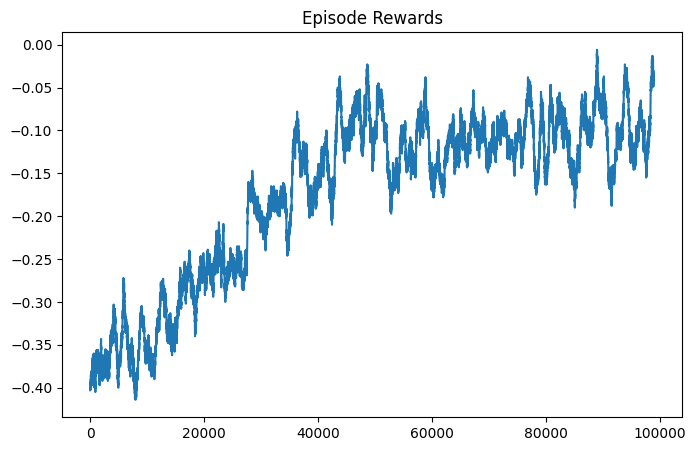

In [85]:
# Plot Episode Rewards
length_step = 1000
fig, ax = plt.subplots(figsize=(, 5))
ax.set_title('Episode Rewards')
reward_moving_average = (np.convolve(np.array(agent.episode_rewards).flatten(), np.ones(length_step) / length_step, mode="valid"))
ax.plot(range(len(reward_moving_average)), reward_moving_average)
plt.show()


## Policy Grid Plot

This plot visualizes the learned policy for both soft and hard hands.


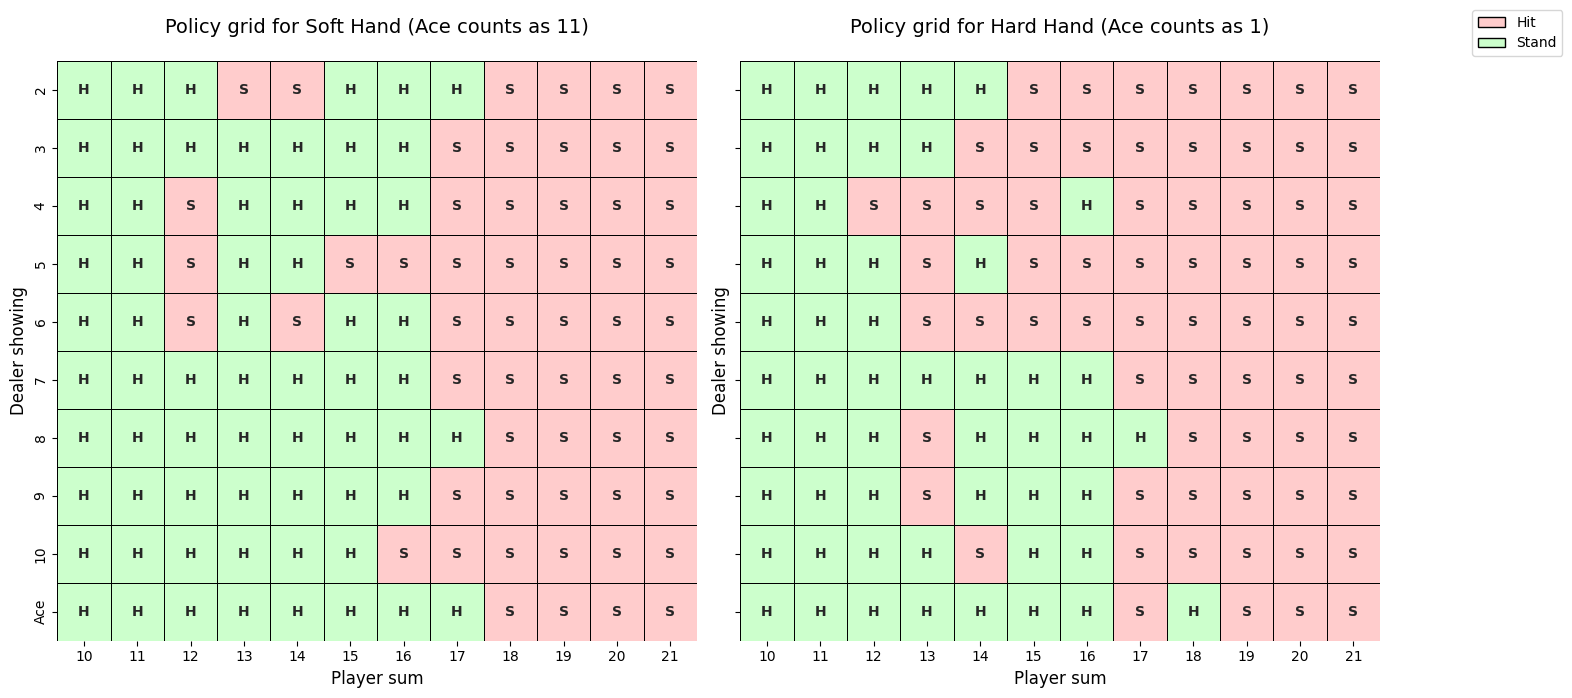

In [86]:
from matplotlib.patches import Patch

def create_policy_grid(agent, soft=True):
    policy = defaultdict(int)
    for state_action in agent.Q.keys():
        state, action = state_action
        is_soft = state[2]
        if (soft and is_soft) or (not soft and not is_soft):
            state_key = (state[0], state[1], state[2], state[3], state[4])
            policy[state_key] = 'H' if max(['hit', 'stand'], key=lambda a: agent.Q.get((state, a), 0)) == 'hit' else 'S'

    player_sums, dealer_showing = np.meshgrid(np.arange(10, 22), np.arange(2, 12))
    policy_grid = np.apply_along_axis(lambda state: policy.get((state[0], state[1], soft, False, False), 'H'), axis=2, arr=np.dstack([player_sums, dealer_showing]))

    return policy_grid

def plot_policy_grids(policy_grid_soft, policy_grid_hard):
    player_sums, dealer_showing = np.meshgrid(np.arange(10, 22), np.arange(2, 12))

    fig, axes = plt.subplots(1, 2, figsize=(14, 7), sharey=True)

    sns.heatmap(policy_grid_soft == 'H', linewidth=0.5, annot=policy_grid_soft, fmt='', cmap=['#ffcccc', '#ccffcc'], cbar=False, ax=axes[0], linecolor='black', annot_kws={"size": 10, "weight": "bold"})
    axes[0].set_title("Policy grid for Soft Hand (Ace counts as 11)", fontsize=14, pad=20)
    axes[0].set_xlabel("Player sum", fontsize=12)
    axes[0].set_ylabel("Dealer showing", fontsize=12)
    axes[0].set_xticklabels(np.arange(10, 22), fontsize=10)
    axes[0].set_yticklabels([2, 3, 4, 5, 6, 7, 8, 9, 10, "Ace"], fontsize=10)

    sns.heatmap(policy_grid_hard == 'H', linewidth=0.5, annot=policy_grid_hard, fmt='', cmap=['#ffcccc', '#ccffcc'], cbar=False, ax=axes[1], linecolor='black', annot_kws={"size": 10, "weight": "bold"})
    axes[1].set_title("Policy grid for Hard Hand (Ace counts as 1)", fontsize=14, pad=20)
    axes[1].set_xlabel("Player sum", fontsize=12)
    axes[1].set_ylabel("Dealer showing", fontsize=12)
    axes[1].set_xticklabels(np.arange(10, 22), fontsize=10)
    axes[1].set_yticklabels([2, 3, 4, 5, 6, 7, 8, 9, 10, "Ace"], fontsize=10)

    legend_elements = [Patch(facecolor="#ffcccc", edgecolor="black", label="Hit"), Patch(facecolor="#ccffcc", edgecolor="black", label="Stand")]
    fig.legend(handles=legend_elements, bbox_to_anchor=(1.05, 1), loc='upper left')

    plt.tight_layout()
    plt.show()

policy_grid_soft = create_policy_grid(agent, soft=True)
policy_grid_hard = create_policy_grid(agent, soft=False)

plot_policy_grids(policy_grid_soft, policy_grid_hard)


## Q-Value Optimization Plot

This plot shows the Q-values for hit and stand actions, illustrating the optimization process.


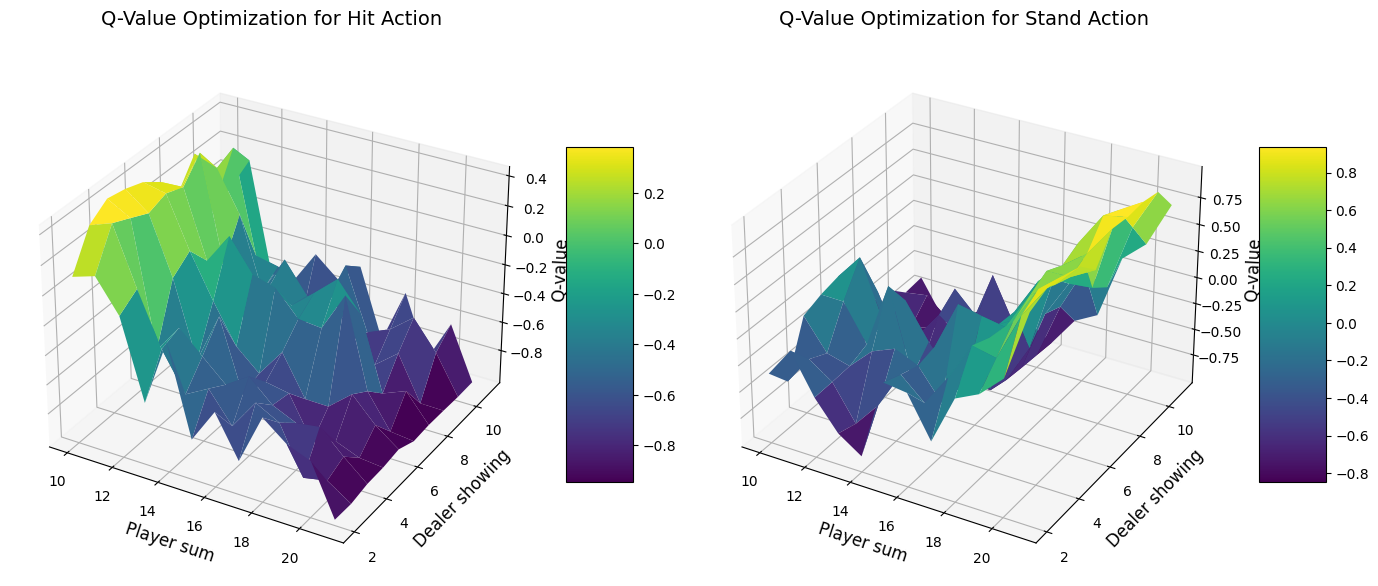

In [87]:
from mpl_toolkits.mplot3d import Axes3D

def create_q_value_grid(agent, action='hit'):
    q_values = defaultdict(float)
    for state_action in agent.Q.keys():
        state, action_taken = state_action
        if action_taken == action:
            q_values[state] = agent.Q[state_action]

    player_sums, dealer_showing = np.meshgrid(np.arange(10, 22), np.arange(2, 12))
    q_value_grid = np.apply_along_axis(lambda state: q_values.get((state[0], state[1], False, False, False), 0), axis=2, arr=np.dstack([player_sums, dealer_showing]))

    return player_sums, dealer_showing, q_value_grid

def plot_q_value_grids(player_sums, dealer_showing, q_value_grid_hit, q_value_grid_stand):
    fig = plt.figure(figsize=(14, 7))

    ax1 = fig.add_subplot(121, projection='3d')
    surf1 = ax1.plot_surface(player_sums, dealer_showing, q_value_grid_hit, cmap='viridis', edgecolor='none')
    ax1.set_title("Q-Value Optimization for Hit Action", fontsize=14, pad=20)
    ax1.set_xlabel("Player sum", fontsize=12)
    ax1.set_ylabel("Dealer showing", fontsize=12)
    ax1.set_zlabel("Q-value", fontsize=12)
    ax1.set_xticks(np.arange(10, 22, 2))
    ax1.set_yticks(np.arange(2, 12, 2))
    fig.colorbar(surf1, ax=ax1, shrink=0.5, aspect=5)

    ax2 = fig.add_subplot(122, projection='3d')
    surf2 = ax2.plot_surface(player_sums, dealer_showing, q_value_grid_stand, cmap='viridis', edgecolor='none')
    ax2.set_title("Q-Value Optimization for Stand Action", fontsize=14, pad=20)
    ax2.set_xlabel("Player sum", fontsize=12)
    ax2.set_ylabel("Dealer showing", fontsize=12)
    ax2.set_zlabel("Q-value", fontsize=12)
    ax2.set_xticks(np.arange(10, 22, 2))
    ax2.set_yticks(np.arange(2, 12, 2))
    fig.colorbar(surf2, ax=ax2, shrink=0.5, aspect=5)

    plt.tight_layout()
    plt.show()

player_sums, dealer_showing, q_value_grid_hit = create_q_value_grid(agent, action='hit')
player_sums, dealer_showing, q_value_grid_stand = create_q_value_grid(agent, action='stand')

plot_q_value_grids(player_sums, dealer_showing, q_value_grid_hit, q_value_grid_stand)
